In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, desc, col, round
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [26]:
spark = SparkSession.builder \
    .appName("Análisis de eventos de comercio electrónico") \
    .getOrCreate()


In [27]:
#octubre
df1 = spark.read.format("csv").option("header", "true").load("/Users/gonzaloperezreich/Desktop/Proyecto apache/2019-Oct.csv")
#noviembre
df2 = spark.read.format("csv").option("header", "true").load("/Users/gonzaloperezreich/Desktop/Proyecto apache/2019-Nov.csv")
#diciembre
df3 = spark.read.format("csv").option("header", "true").load("/Users/gonzaloperezreich/Desktop/Proyecto apache/2019-Dec.csv")
#enero
df4= spark.read.format("csv").option("header", "true").load("/Users/gonzaloperezreich/Desktop/Proyecto apache/2020-Jan.csv")
#febrero
df5 = spark.read.format("csv").option("header", "true").load("/Users/gonzaloperezreich/Desktop/Proyecto apache/2020-Feb.csv")


23/06/22 11:02:02 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

# Data discovery 

## Monthly and Totally Data:

Almost 21 million of transactions recorded in 5 months

In [28]:
octubre= df1.count()
noviembre= df2.count()
diciembre= df3.count()
enero= df4.count()
febrero= df5.count()

23/06/22 11:02:22 ERROR Inbox: Ignoring error                       (0 + 4) / 4]
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndp

23/06/22 11:02:42 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

In [29]:
print("por orden (octubre,noviembre,diciembre,enero,febrero): ",octubre,noviembre,diciembre,enero,febrero)
print("total: "+ str(octubre+noviembre+diciembre+enero+febrero))

por orden (octubre,noviembre,diciembre,enero,febrero):  4102283 4635837 3533286 4264752 4156682
total: 20692840


23/06/22 11:02:52 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

## Unique users per month
January registers the greatest amount of individual users. Also we can see a little drop down in the quatity of users in november and december in comparison with october

In [6]:
unique_users = df1.select('user_id').distinct().count()
unique_users1 = df2.select('user_id').distinct().count()
unique_users2 = df3.select('user_id').distinct().count()
unique_users3 = df4.select('user_id').distinct().count()
unique_users4= df5.select('user_id').distinct().count()

399664 368232 370154 410073 391055


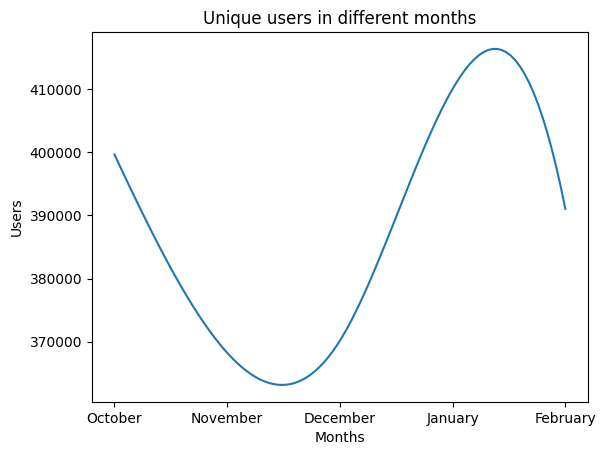

23/06/22 10:58:02 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

In [22]:
print(unique_users,unique_users1,unique_users2,unique_users3, unique_users4)
users=np.array([unique_users,unique_users1,unique_users2,unique_users3, unique_users4])
months=np.array(["October", "November", "December","January", "February"])
# Crear una función de interpolación
f = interp1d(np.arange(len(months)), users, kind='cubic')

x_interp = np.linspace(0, len(months) - 1, 100)
users_interp = f(x_interp)

plt.plot(x_interp, users_interp)
plt.xlabel("Months")
plt.ylabel("Users")
plt.title("Unique users in different months")
plt.xticks(np.arange(len(months)), months)  # Establecer las marcas en el eje x
plt.show()

## Average activity for users:
We can see that the average activity changes in November and December, Why does that happen?

In [24]:
eventos_octubre = octubre / unique_users
eventos_nov = noviembre / unique_users1
eventos_dic = diciembre / unique_users2
eventos_en = enero / unique_users3
eventos_feb = febrero / unique_users4
print(eventos_octubre, eventos_nov, eventos_dic,eventos_en,eventos_feb)

10.264329536810921 12.589446327315388 9.545448651101974 10.399982442150543 10.629405070897956


23/06/22 11:01:32 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

## Productos populares

In [40]:
popular_products = df1.groupBy('product_id').count().orderBy('count', ascending=False)

In [45]:
# Calcular la cantidad de ventas por producto
sales_stats = df1.filter(df1.event_type == 'purchase') \
                .groupBy('product_id') \
                .agg(round(sum(col('price'))).alias('total_sales')) \
                .orderBy(desc('total_sales'))

# Calcular la cantidad de veces que se agregaron al carrito por producto
add_to_cart_stats = df1.filter(df1.event_type == 'cart') \
                      .groupBy('product_id') \
                      .count() \
                      .orderBy(desc('count'))

# Calcular la cantidad de veces que se sacaron del carrito por producto
remove_from_cart_stats = df1.filter(df1.event_type == 'remove_from_cart') \
                           .groupBy('product_id') \
                           .count() \
                           .orderBy(desc('count'))

# Mostrar las estadísticas de ventas
sales_stats.show()

# Mostrar las estadísticas de agregados al carrito
add_to_cart_stats.show()

# Mostrar las estadísticas de sacados del carrito
remove_from_cart_stats.show()





+----------+-----------+
|product_id|total_sales|
+----------+-----------+
|   5877454|    11117.0|
|   5560754|     8555.0|
|   5560756|     7694.0|
|   5856186|     7088.0|
|   5751422|     7052.0|
|   5846437|     6288.0|
|   5792800|     6109.0|
|   5751383|     5841.0|
|   5855507|     5782.0|
|   5849033|     4541.0|
|     89343|     4497.0|
|   5861276|     3996.0|
|   5528035|     3818.0|
|   5892179|     3816.0|
|   5882788|     3594.0|
|   5795346|     3523.0|
|   5692527|     3451.0|
|   5804820|     3420.0|
|   5866964|     3406.0|
|   5560758|     3371.0|
+----------+-----------+
only showing top 20 rows



+----------+-----+
|product_id|count|
+----------+-----+
|   5700037| 4998|
|   5802432| 4693|
|   5686925| 4356|
|   5854897| 3966|
|   5700046| 2897|
|   5815662| 2830|
|   5688124| 2745|
|   5836522| 2470|
|   5751422| 2251|
|   5751383| 2068|
|   5792800| 1965|
|      5304| 1959|
|   5700035| 1890|
|   5849033| 1652|
|   5809911| 1597|
|   5843836| 1584|
|   5809912| 1580|
|      5581| 1454|
|   5528035| 1438|
|   5565820| 1396|
+----------+-----+
only showing top 20 rows



+----------+-----+
|product_id|count|
+----------+-----+
|   5700037| 1412|
|   5751422| 1219|
|   5686925| 1191|
|   5854897| 1175|
|   5751383| 1158|
|   5802432| 1156|
|   5815662| 1077|
|   5809912| 1060|
|   5792800| 1054|
|   5809911|  950|
|   5773361|  801|
|   5773605|  773|
|   5819112|  768|
|   5820746|  739|
|      5304|  732|
|   5528035|  726|
|   5849033|  718|
|   5816170|  711|
|      5013|  673|
|   5833334|  649|
+----------+-----+
only showing top 20 rows



La gente compra mas productos en noviembre que en diciembre, se tiene a hipotesis que existe anticipacion de la navidad, sumado a ello el black friday es el 24 de noviembre. así que veremos si la mayoria de las ventas de noviembre se llevan a cabo en ese periodo de tiempo 

In [47]:
# Filtrar los registros de compras
compras_oct = df1.filter(col('event_type') == 'purchase')
total_compras_oct = compras_oct.count()

compras_nov = df2.filter(col('event_type') == 'purchase')
total_compras_nov = compras_nov.count()

compras_dic = df3.filter(col('event_type') == 'purchase')
total_compras_dic = compras_dic.count()

compras_en = df4.filter(col('event_type') == 'purchase')
total_compras_en = compras_en.count()

compras_feb = df5.filter(col('event_type') == 'purchase')
total_compras_feb = compras_feb.count()
# Mostrar el resultado
print("Total de compras octubre:", total_compras_oct)
print("Total de compras nov:", total_compras_nov)
print("Total de compras dic:", total_compras_dic)
print("Total de compras en:", total_compras_en)
print("Total de compras feb:", total_compras_feb)






Total de compras octubre: 245624
Total de compras nov: 322417
Total de compras dic: 213176
Total de compras en: 263797
Total de compras feb: 241993


### Black Friday        

se cayó la hipotesis

In [3]:

# Filtrar los registros de compras en la fecha del 24 de noviembre
compras_24_nov = df2.filter((col('event_type') == 'purchase') & (col('event_time').contains('2019-11-24')))
total_compras_24_nov = compras_24_nov.count()

# Mostrar el resultado
print("Total de compras el 24 de noviembre:", total_compras_24_nov)
print("porcentaje de ventas= ", str((total_compras_24_nov/322417) *100)+"%")


NameError: name 'df2' is not defined

In [59]:

# Filtrar los registros de compras
compras = df2.filter(col('event_type') == 'purchase')

# Contar la cantidad de ventas por fecha
ventas_por_fecha = compras.groupBy('event_time').count().orderBy(col('count').desc())

# Obtener la fecha con la mayor cantidad de ventas
fecha_max_ventas = ventas_por_fecha.select('event_time').first()[0]

# Mostrar el resultado
print("Fecha con mayor cantidad de ventas:", fecha_max_ventas)



Fecha con mayor cantidad de ventas: 2019-11-18 01:17:08 UTC


In [60]:
ventas_por_fecha.show()

+--------------------+-----+
|          event_time|count|
+--------------------+-----+
|2019-11-18 01:17:...|  279|
|2019-11-07 12:31:...|  252|
|2019-11-20 06:14:...|  172|
|2019-11-28 13:54:...|  162|
|2019-11-18 02:06:...|  149|
|2019-11-01 02:47:...|  148|
|2019-11-22 01:31:...|  145|
|2019-11-02 03:03:...|  138|
|2019-11-08 11:32:...|  133|
|2019-11-22 06:58:...|  129|
|2019-11-01 15:46:...|  116|
|2019-11-07 16:01:...|  116|
|2019-11-24 21:58:...|  116|
|2019-11-29 19:52:...|  113|
|2019-11-18 07:24:...|  112|
|2019-11-05 16:48:...|  110|
|2019-11-28 18:53:...|  109|
|2019-11-02 13:18:...|  108|
|2019-11-14 00:37:...|  108|
|2019-11-12 09:40:...|  103|
+--------------------+-----+
only showing top 20 rows

